# 05.3 - Seasonality and trend

Some data can have not just a repeating pattern, but a changing baseline underneath as well.

We all acknowledge most people have a different routine on weekdays than they have during weekends (not us, we're always working). This was completely true pre-pandemic, and it has changed significantly in the present. However, we still have most weekly habits of eating, sleeping, cleaning, etc..

Now you must consider our entire economy is set on top of our habits.

Some things repeat daily, or weekly, of yearly, or...

Let's analyse one of the classic datasets, consisting of air travel between 1949 and 1961 in the US.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
## Airline passengers
airline_file = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'

dair = pd.read_csv(airline_file)
## Shampoo sales: This is a surprise for later
##file_4 = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv'

In [3]:
dair.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


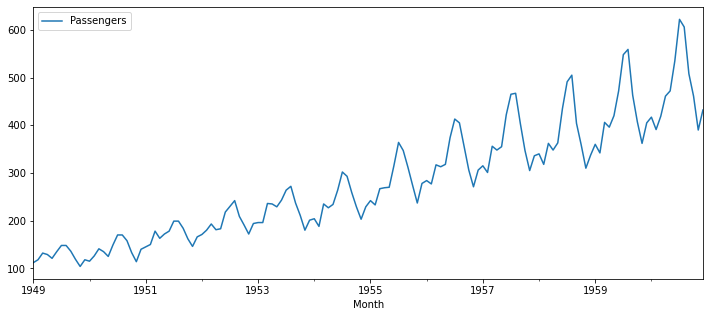

In [6]:
dair_series = dair.set_index('Month')
dair_series.index = pd.to_datetime(dair_series.index)

dair_series.plot(figsize=(12,5))
#plt.xlim('1959', '1961')
plt.show()

<div class="alert alert-info">
    <br>
    <b>Question: What trend and repetitive pattern can you identify just by looking at the plot?</b>      
    <br>
    <br>
</div>

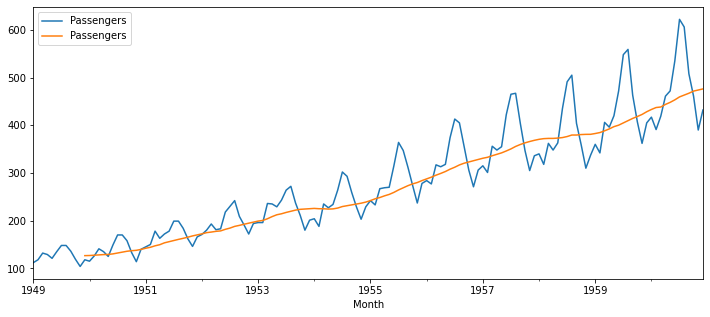

In [7]:
fig, ax = plt.subplots(figsize=(12,5))

dair_series.plot(ax=ax)
dair_series.rolling(12).mean().plot(ax=ax)

plt.show()

Doing a rolling average with few points loses me the initial year. It gives me the overall trend, but I also lose the seasonality of yearly number of passengers.

Let's take a look at some more advanced techniques that allow more rigorous analyses.

---

## STL decomposition

The STL "Seasonal and Trend decomposition using Loess" method can decompose data into several components. It employs polynomial dcomposition that, together with a user-defined periodicity, extracts three major components: Trend __T__, Seasonality __S__, and Residues __R__. You can also define if the model decomposes the data in an __additive__ or __multiplticative__ model. This means you can have your data __D__ represented as:

D = T + S + R

or

D = T * S * R

STL decomposition is good for the analysis of periodic economic KPIs, like electricity consumption through the day, number of passengers on public transportation, etc.. STL can quickly and robustely identify outliers. But remember: STL has no idea about holidays happening!

In [9]:
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.seasonal import seasonal_decompose

In [10]:
res = STL(dair_series).fit()

In [11]:
res

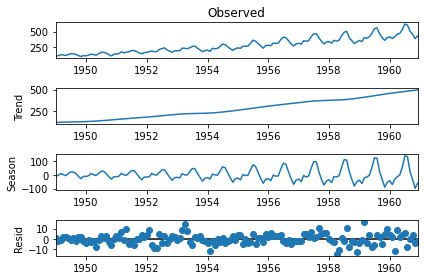

In [12]:
figres = res.plot()

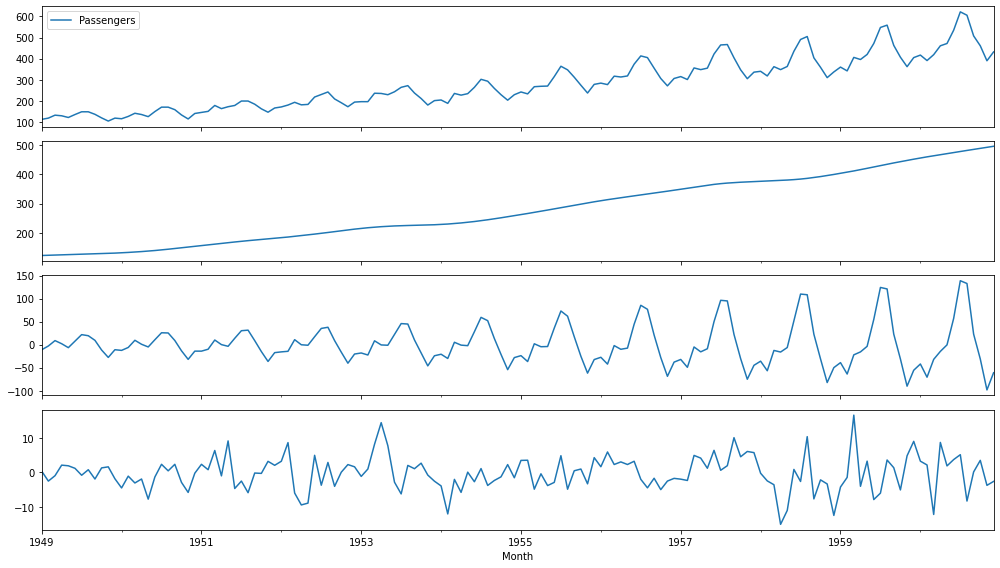

In [13]:
fig, ax = plt.subplots(figsize=(14,8), nrows=4, sharex=True)

res.observed.plot(ax=ax[0])

res.trend.plot(ax=ax[1])

res.seasonal.plot(ax=ax[2])

res.resid.plot(ax=ax[3])

plt.tight_layout()
plt.show()

Much like datetime, STL is smart, but not intteligent. It is a best practice to always make your period explicit in the code, if you know it beforehand. You can even use STL first to have an idea of what your period should be.

The __period__ is the number of data points you consider your data to repeat. In this case, we have monthly data, and it is a fair assessment to say the cycles look yearly. People used to travel during Summer, before covid.

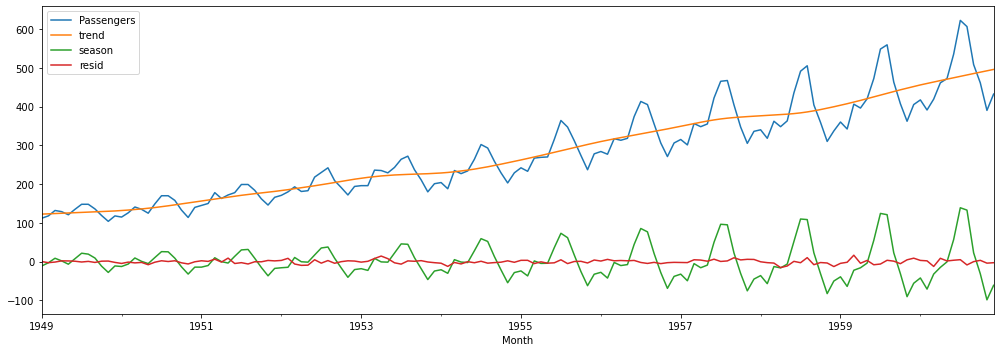

In [16]:
fig, ax = plt.subplots(figsize=(14,5), nrows=1, sharex=True)

res.observed.plot(ax=ax)

res.trend.plot(ax=ax)

res.seasonal.plot(ax=ax)

res.resid.plot(ax=ax)

plt.legend()
plt.tight_layout()
plt.show()

In [15]:
res = STL(dair_series, period=12).fit()

Remember that, by default, the model is __additive__. You can specify a __multiplicative__ model. The choice of the model depends on the data source. In this course, we'll only tackle __additive__ models.



If you wish to focus on the seasonal component, you can use a special version of __STL__, in a function called __seasonal_decompose__.

Since this method is a mix of moving averages and STL, you will also lose some information at the beginning and the end in your calculated trend.

In [17]:
sdc = seasonal_decompose(dair_series, period=12, model='multiplitcative')

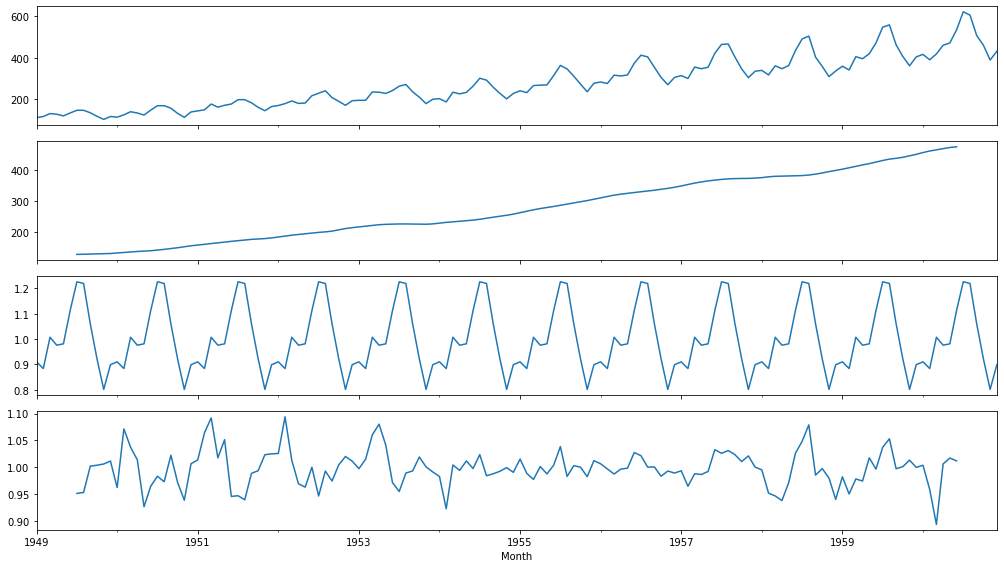

In [18]:
fig, ax = plt.subplots(figsize=(14,8), nrows=4, sharex=True)

sdc.observed.plot(ax=ax[0])

sdc.trend.plot(ax=ax[1])

sdc.seasonal.plot(ax=ax[2])

sdc.resid.plot(ax=ax[3])

plt.tight_layout()
plt.show()

Notice the missing points in the beginning and the end of the data interval, much like a moving average.
---
Decomposing data is a great way to analyse it. The next step is to [predict it](05.4-Forecasting.ipynb).